Reading the "Reducing the Dimensionality of data with neural networks" paper by G. E. Hinton* and R. R. Salakhutdinov - https://www.cs.toronto.edu/~hinton/absps/science.pdf

Dimensionality reduction is the process of transforming data from a high dimensional space to a lower dimensional space (3D to 2D) while preserving as much information as possible during the reduction. It is useful because working with high dimensional data has some disadvantages (https://en.wikipedia.org/wiki/Curse_of_dimensionality) - more data is needed and organizing it is generally harder.

# Loading MNIST

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(dataset,
                                         shuffle=True, num_workers=2)


/home/petko/projects/ai-notebooks/env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Visualizing an image from MNIST

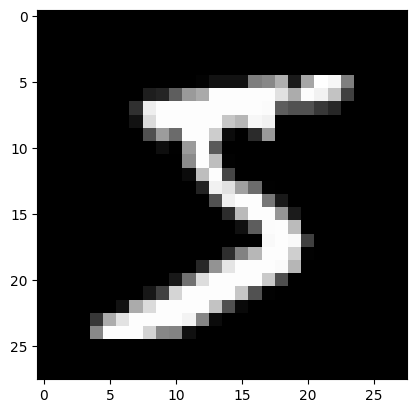

In [3]:
def show_image(image):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.show()
    
x = dataloader.dataset[0][0]    

show_image(x)

There are a few methods for reducing the dimensionality - heatmaps, t-SNE, Multi-Dimensional Scaling, etc. A pretty simple and standard way of reducing the dimensionality is a method called Principal Component Analysis (PCA):

# Applying Principal Component Analysis (PCA):

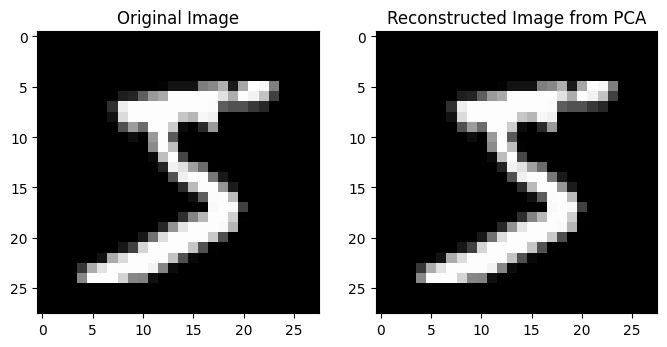

In [4]:
x_flattened = x.view(-1)

mean_x = torch.mean(x_flattened)

# Compute the covariance matrix
centered_image = x_flattened - mean_x
covariance_matrix = torch.mm(centered_image.unsqueeze(1), centered_image.unsqueeze(0)) / (x_flattened.numel() - 1)

# Compute the eigenvectors using SVD
_, s, v = torch.svd(covariance_matrix)

# Project the data onto the principal components
num_components = 10  # You can choose any desired number of principal components
principal_components = v[:, :num_components].t()  # Transpose for proper matrix multiplication
projected_data = torch.mm(centered_image.unsqueeze(0), principal_components.t())

# Reconstruct the data from the principal components
reconstructed_data = torch.mm(projected_data, principal_components) + mean_x.view(1, -1)

# Reshape the reconstructed data back to the original image size
reconstructed_image = reconstructed_data.view(x.size())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.squeeze().detach(), cmap='gray')
plt.title('Reconstructed Image from PCA')
plt.show()

# Using Autoencoder for dimensionality reduction